In [0]:
!pip install schedule

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import schedule
import time
#%matplotlib inline #if you're working in a Jupyter notebook
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
df.head()


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [0]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [0]:
group_by_country = df.groupby(by=['Country'])
data_avg = group_by_country.mean()
data_count = group_by_country.count()
print(data_avg)
print(data_count)

                     Confirmed   Recovered      Deaths
Country                                               
Afghanistan         349.223301   38.242718   10.815534
Albania             196.407767   93.990291    8.854369
Algeria             847.067961  294.126214  105.786408
Andorra             234.300971   68.990291   10.563107
Angola                7.271845    1.582524    0.699029
...                        ...         ...         ...
West Bank and Gaza  118.970874   21.184466    0.708738
Western Sahara        1.553398    0.533981    0.000000
Yemen                 0.563107    0.097087    0.077670
Zambia               22.330097    9.970874    0.689320
Zimbabwe              7.563107    0.553398    1.038835

[187 rows x 3 columns]
                    Date  Confirmed  Recovered  Deaths
Country                                               
Afghanistan          103        103        103     103
Albania              103        103        103     103
Algeria              103        103      

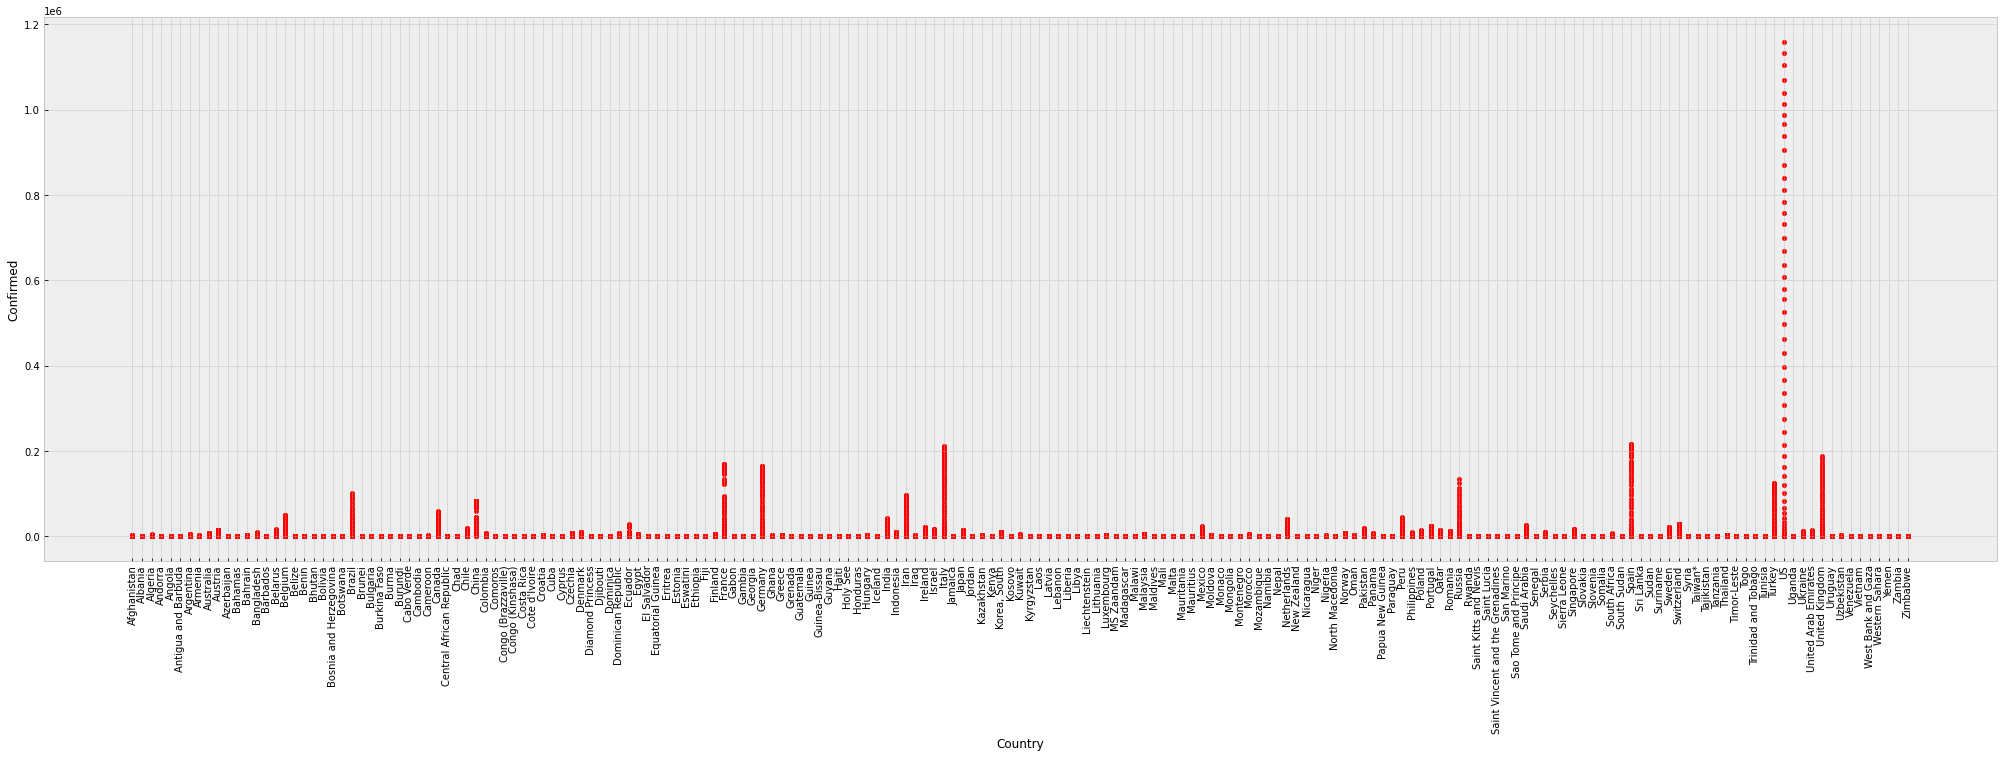

In [0]:
ax = df.plot(kind='scatter',x='Country',y='Confirmed',color='red',figsize=(35,10))
plt.xticks(rotation=90)
plt.show()

fig = ax.get_figure()
fig.savefig('countries_confirmed.jpg')

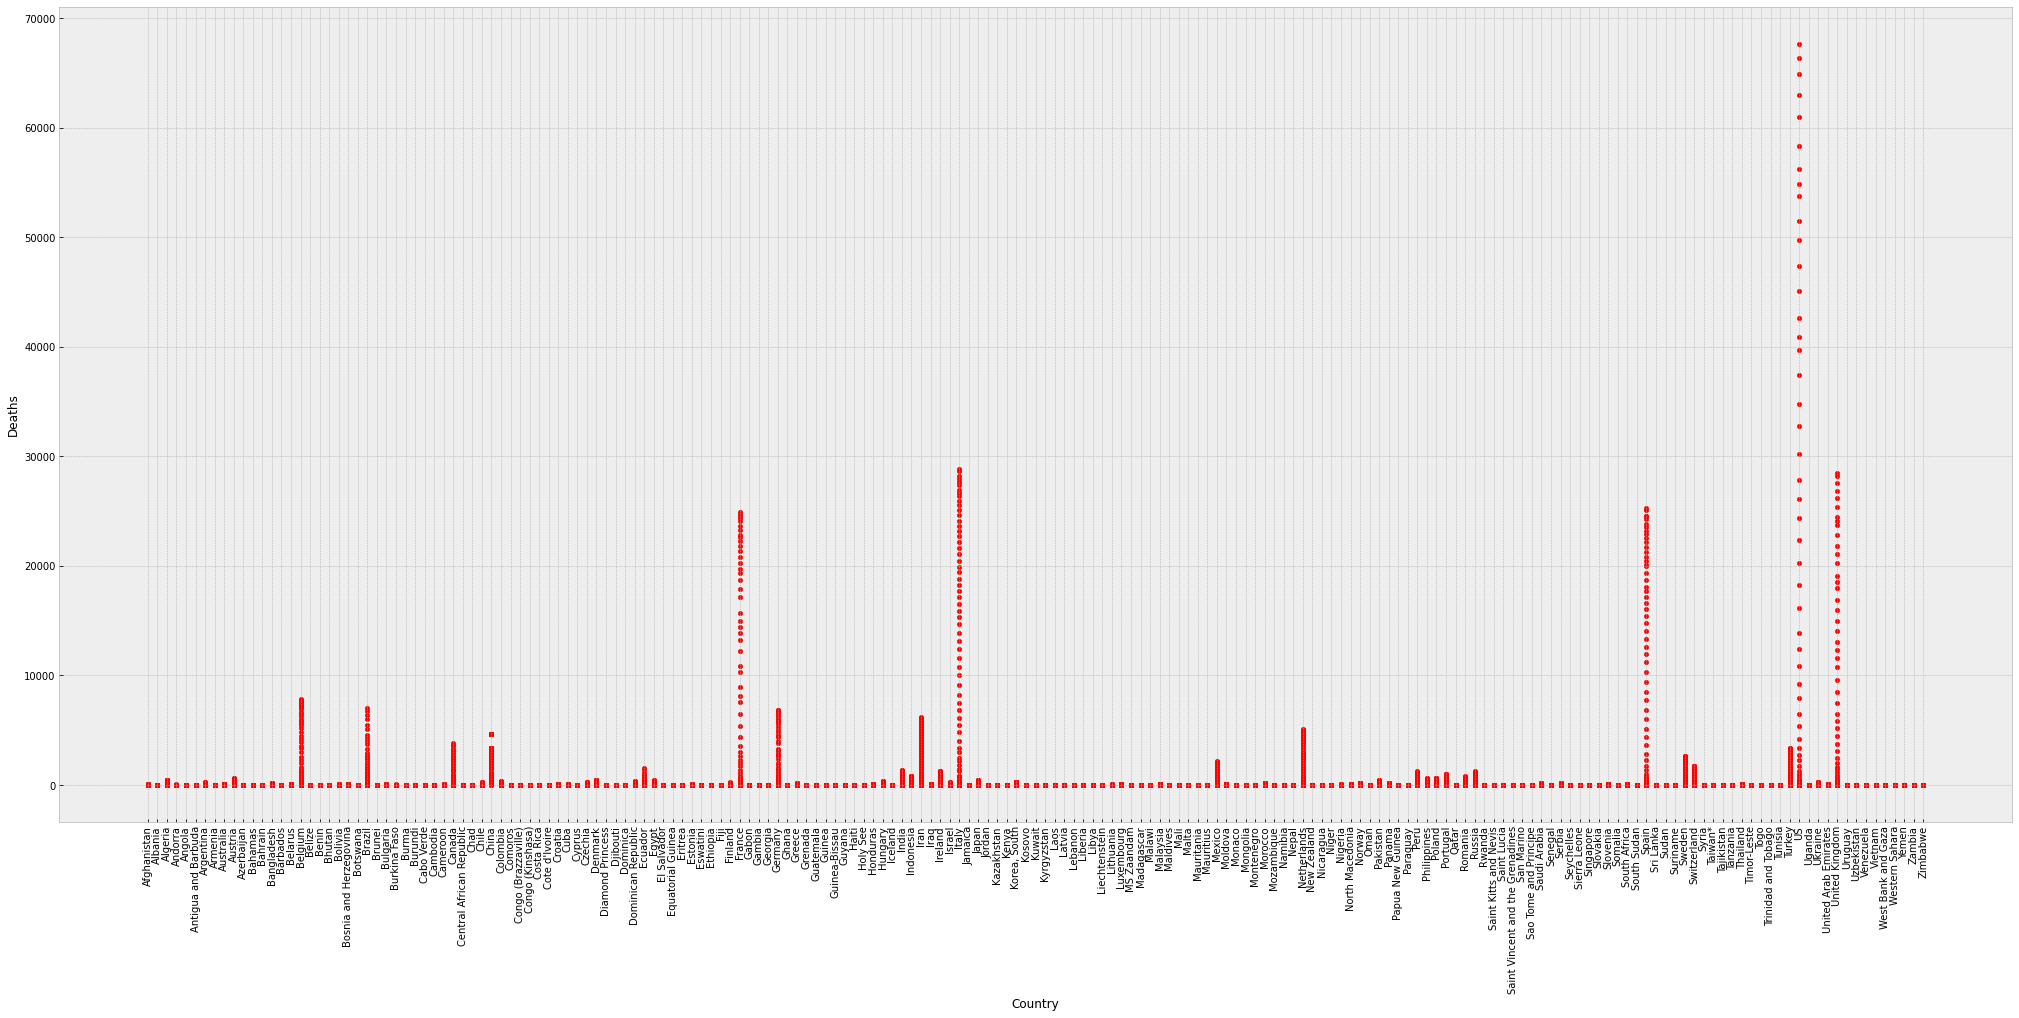

In [0]:
ax = df.plot(kind='scatter',x='Country',y='Deaths',color='red',figsize=(35,15))
plt.xticks(rotation=90)
plt.show()

fig = ax.get_figure()
fig.savefig('countries_deaths.jpg')

In [0]:
# sns.lmplot("Date", "Confirmed", data=df, hue="Country", fit_reg=False, col='Country', col_wrap=2)


In [0]:
print(type(df['Deaths']))

<class 'pandas.core.series.Series'>


In [0]:
countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'China','Pakistan','India']
df = df[df['Country'].isin(countries)]
df.head()


,Date,Country,Confirmed,Recovered,Deaths
32,2020-01-22,Canada,0,0,0
36,2020-01-22,China,548,28,17
61,2020-01-22,France,0,0,0
65,2020-01-22,Germany,0,0,0
78,2020-01-22,India,0,0,0


In [0]:
# Section 3 - Creating a Summary Column
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Cases
32,2020-01-22,Canada,0,0,0,0
36,2020-01-22,China,548,28,17,593
61,2020-01-22,France,0,0,0,0
65,2020-01-22,Germany,0,0,0,0
78,2020-01-22,India,0,0,0,0


In [0]:
df

,Date,Country,Confirmed,Recovered,Deaths,Cases
32,2020-01-22,Canada,0,0,0,0
36,2020-01-22,China,548,28,17,593
61,2020-01-22,France,0,0,0,0
65,2020-01-22,Germany,0,0,0,0
78,2020-01-22,India,0,0,0,0
...,...,...,...,...,...,...
17640,2020-04-26,Germany,157770,112000,5976,275746
17653,2020-04-26,India,27890,6523,881,35294
17703,2020-04-26,Pakistan,13328,2936,281,16545
17746,2020-04-26,US,965785,106988,54881,1127654


In [0]:
# Section 4 - Restructuring our Data
df = df.pivot(index='Date', columns='Country', values='Cases')
df.head()


Country,Canada,China,France,Germany,India,Pakistan,US,United Kingdom
Date,,,,,,,,
2020-01-22,0,593,0,0,0,0,1,0
2020-01-23,0,691,0,0,0,0,1,0
2020-01-24,0,982,2,0,0,0,2,0
2020-01-25,0,1487,3,0,0,0,2,0
2020-01-26,1,2180,3,0,0,0,5,0


In [0]:
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries
covid.head()

,Canada,China,France,Germany,India,Pakistan,US,United Kingdom
Date,,,,,,,,
2020-01-22,0,593,0,0,0,0,1,0
2020-01-23,0,691,0,0,0,0,1,0
2020-01-24,0,982,2,0,0,0,2,0
2020-01-25,0,1487,3,0,0,0,2,0
2020-01-26,1,2180,3,0,0,0,5,0


In [0]:
covid.tail()

,Canada,China,France,Germany,India,Pakistan,US,United Kingdom
Date,,,,,,,,
2020-04-22,58177,166365,218679,255327,26421,12444,964339,153472
2020-04-23,60286,166503,222954,262004,28810,13919,999327,158749
2020-04-24,61587,166644,226502,270559,30808,14948,1056386,164931
2020-04-25,64051,166720,229664,272190,33047,15858,1092281,170724
2020-04-26,66689,166826,230791,275746,35294,16545,1127654,175609


In [0]:
covid['Pakistan'].to_list()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 4,
 4,
 4,
 5,
 5,
 5,
 6,
 6,
 7,
 7,
 17,
 21,
 22,
 30,
 33,
 55,
 138,
 238,
 301,
 469,
 517,
 746,
 786,
 886,
 997,
 1092,
 1231,
 1407,
 1536,
 1640,
 1814,
 2040,
 2239,
 2580,
 2852,
 2990,
 3415,
 4078,
 4521,
 4791,
 5126,
 5488,
 5859,
 6349,
 6684,
 7311,
 7940,
 8692,
 8925,
 9613,
 10384,
 10564,
 11839,
 12444,
 13919,
 14948,
 15858,
 16545]

In [0]:
# Section 5 - Calculating Rates per 100,000
populations = {'Canada':37664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'France': 65239883, 'China':1438027228,'Pakistan': 219942372 , 'India': 1376991671}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000

Text(2020-01-23 00:00:00, -100000, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

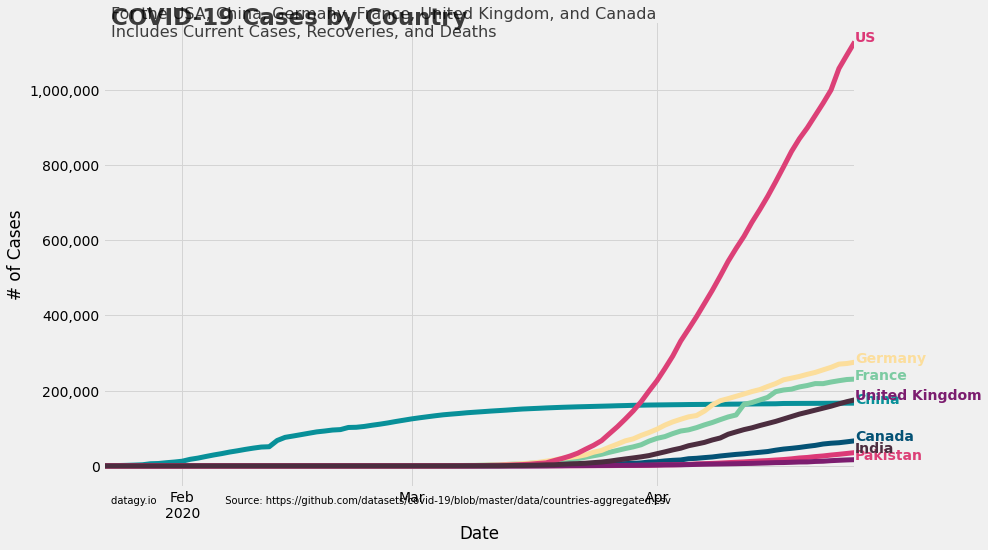

In [0]:
# Section 6 - Generating Colours and Style
colors = {'Canada':'#045275', 'China':'#089099', 'France':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F','Pakistan':'#DC4077', 'India':'#4C2D3F'}
plt.style.use('fivethirtyeight')

# Section 7 - Creating the Visualization
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Section 8 - Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# Section 9 - Adding Labels
plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
plot.text(x = percapita.index[1], y = -100000,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)


Text(2020-01-23 00:00:00, -55, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

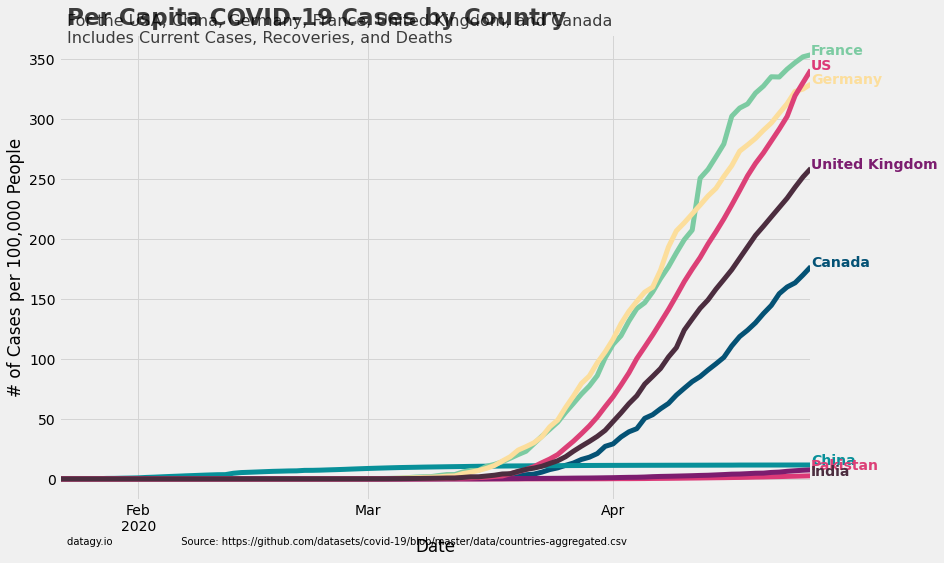

In [0]:
#CASES PER 100,000 PEOPLE
percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+25, s = "Per Capita COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+10, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
percapitaplot.text(x = percapita.index[1], y = -55,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)


# **Analyzing pakistan cases**

In [0]:
# https://www.r-craft.org/r-news/python-data-visualization-covid-19-new-cases-small-multiple-chart/


In [0]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
                         ,sep = ","
                         )
# covid_data
covid_data = covid_data.assign(date = pd.to_datetime(covid_data.Date, format='%Y-%m-%d'))
covid_data = covid_data.fillna(value = {'subregion':''})

In [0]:
covid_data

,Date,Country,Confirmed,Recovered,Deaths,date
0,2020-01-22,Afghanistan,0,0,0,2020-01-22
1,2020-01-22,Albania,0,0,0,2020-01-22
2,2020-01-22,Algeria,0,0,0,2020-01-22
3,2020-01-22,Andorra,0,0,0,2020-01-22
4,2020-01-22,Angola,0,0,0,2020-01-22
...,...,...,...,...,...,...
19256,2020-05-03,West Bank and Gaza,353,77,2,2020-05-03
19257,2020-05-03,Western Sahara,6,5,0,2020-05-03
19258,2020-05-03,Yemen,10,1,2,2020-05-03
19259,2020-05-03,Zambia,124,78,3,2020-05-03


In [0]:
covid_data_PAK = (covid_data
                 .query('Country == "Pakistan"')
                 )
covid_data_PAK

,Date,Country,Confirmed,Recovered,Deaths,date
129,2020-01-22,Pakistan,0,0,0,2020-01-22
316,2020-01-23,Pakistan,0,0,0,2020-01-23
503,2020-01-24,Pakistan,0,0,0,2020-01-24
690,2020-01-25,Pakistan,0,0,0,2020-01-25
877,2020-01-26,Pakistan,0,0,0,2020-01-26
...,...,...,...,...,...,...
18455,2020-04-29,Pakistan,15525,3425,343,2020-04-29
18642,2020-04-30,Pakistan,16817,4315,385,2020-04-30
18829,2020-05-01,Pakistan,18114,4715,417,2020-05-01
19016,2020-05-02,Pakistan,19103,4817,440,2020-05-02


In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


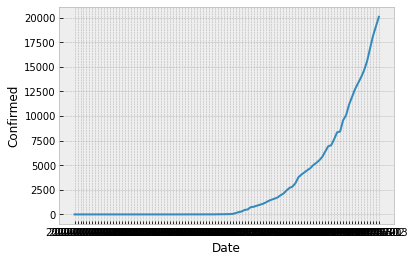

In [0]:
plt.style.use('bmh')
sns.lineplot(data = covid_data_PAK
             ,x = 'Date'
             ,y = 'Confirmed'
             )
# plt.xticks(rotation=45, horizontalalignment='right')

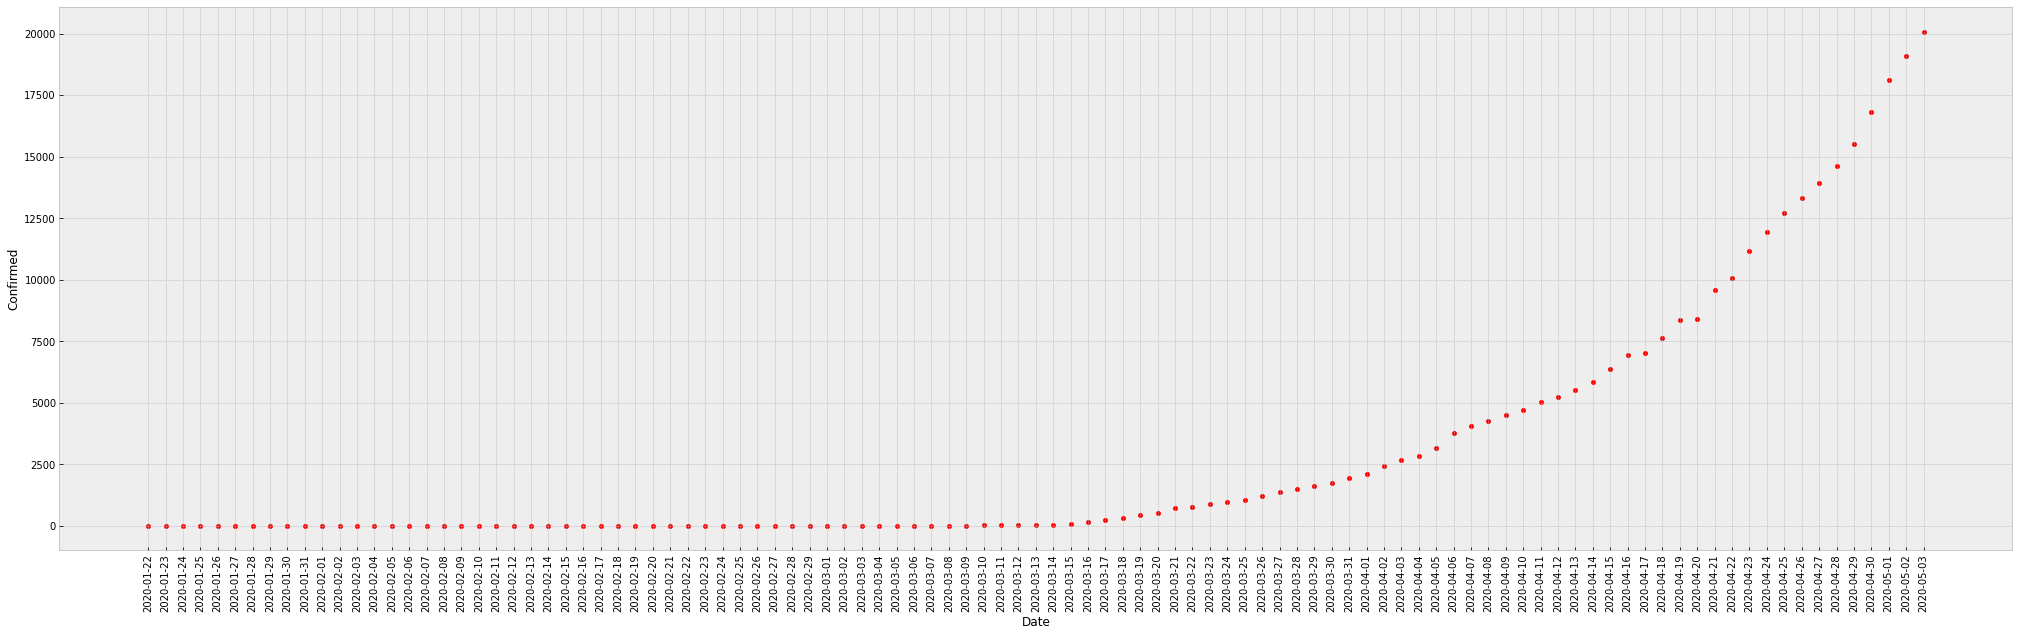

In [0]:
ax = covid_data_PAK.plot(kind='scatter',x='Date',y='Confirmed',color='red',figsize=(35,10))
plt.xticks(rotation=90)
plt.show()

fig = ax.get_figure()
fig.savefig('PAK_date_vs_confirmed.jpg')

# **Analyzing Confirmed Cases**

In [0]:
covid_data_today = (covid_data
                 .query('Date == "2020-05-03"')
                 )
covid_data_today

,Date,Country,Confirmed,Recovered,Deaths,date
19074,2020-05-03,Afghanistan,2704,345,85,2020-05-03
19075,2020-05-03,Albania,795,531,31,2020-05-03
19076,2020-05-03,Algeria,4474,1936,463,2020-05-03
19077,2020-05-03,Andorra,748,493,45,2020-05-03
19078,2020-05-03,Angola,35,11,2,2020-05-03
...,...,...,...,...,...,...
19256,2020-05-03,West Bank and Gaza,353,77,2,2020-05-03
19257,2020-05-03,Western Sahara,6,5,0,2020-05-03
19258,2020-05-03,Yemen,10,1,2,2020-05-03
19259,2020-05-03,Zambia,124,78,3,2020-05-03


In [0]:
covid_top_9_countries = (covid_data_today
 .sort_values('Confirmed', ascending = False)
 .iloc[0:9]
 .Country
)
covid_top_9_countries

19247                US
19231             Spain
19159             Italy
19251    United Kingdom
19136            France
19140           Germany
19213            Russia
19246            Turkey
19097            Brazil
Name: Country, dtype: object

In [0]:
covid_top9_countries = (covid_data_today
 .sort_values('Confirmed', ascending = False)
 .iloc[0:9]
 .Country
)
covid_top9_countries

,Date,Country,Confirmed,Recovered,Deaths,date
19247,2020-05-03,US,1158040,180152,67682,2020-05-03
19231,2020-05-03,Spain,217466,118902,25264,2020-05-03
19159,2020-05-03,Italy,210717,81654,28884,2020-05-03
19251,2020-05-03,United Kingdom,187842,901,28520,2020-05-03
19136,2020-05-03,France,168925,50885,24900,2020-05-03
19140,2020-05-03,Germany,165664,130600,6866,2020-05-03
19213,2020-05-03,Russia,134687,16639,1280,2020-05-03
19246,2020-05-03,Turkey,126045,63151,3397,2020-05-03
19097,2020-05-03,Brazil,101826,42991,7051,2020-05-03


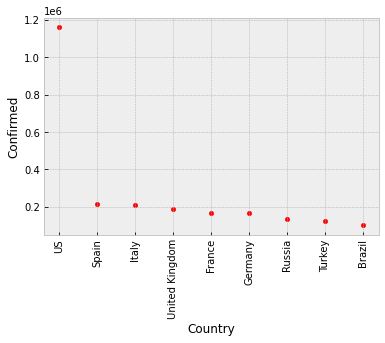

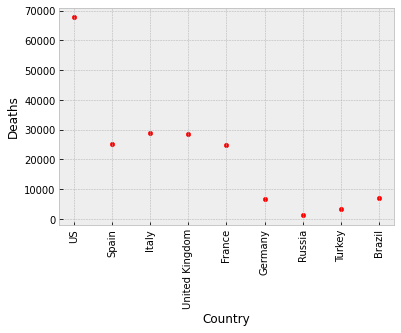

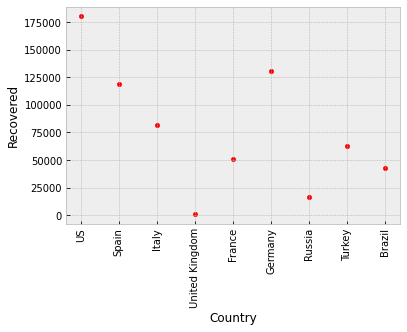

In [0]:
covid_top9_countries.plot(kind='scatter',x='Country',y='Confirmed',color='red')
plt.xticks(rotation=90)
plt.show()

covid_top9_countries.plot(kind='scatter',x='Country',y='Deaths',color='red')
plt.xticks(rotation=90)
plt.show()

covid_top9_countries.plot(kind='scatter',x='Country',y='Recovered',color='red')
plt.xticks(rotation=90)
plt.show()

In [0]:
#Pakistan is on number 24
covid_top25_countries = (covid_data_today
 .sort_values('Confirmed', ascending = False)
 .iloc[0:25]
)
covid_top25_countries

,Date,Country,Confirmed,Recovered,Deaths,date
19247,2020-05-03,US,1158040,180152,67682,2020-05-03
19231,2020-05-03,Spain,217466,118902,25264,2020-05-03
19159,2020-05-03,Italy,210717,81654,28884,2020-05-03
19251,2020-05-03,United Kingdom,187842,901,28520,2020-05-03
19136,2020-05-03,France,168925,50885,24900,2020-05-03
19140,2020-05-03,Germany,165664,130600,6866,2020-05-03
19213,2020-05-03,Russia,134687,16639,1280,2020-05-03
19246,2020-05-03,Turkey,126045,63151,3397,2020-05-03
19097,2020-05-03,Brazil,101826,42991,7051,2020-05-03
19155,2020-05-03,Iran,97424,78422,6203,2020-05-03


In [0]:
covid_top25_countries['Country']

19247                US
19231             Spain
19159             Italy
19251    United Kingdom
19136            France
19140           Germany
19213            Russia
19246            Turkey
19097            Brazil
19155              Iran
19110             China
19106            Canada
19090           Belgium
19207              Peru
19153             India
19195       Netherlands
19236       Switzerland
19126           Ecuador
19220      Saudi Arabia
19210          Portugal
19186            Mexico
19235            Sweden
19157           Ireland
19203          Pakistan
19109             Chile
Name: Country, dtype: object

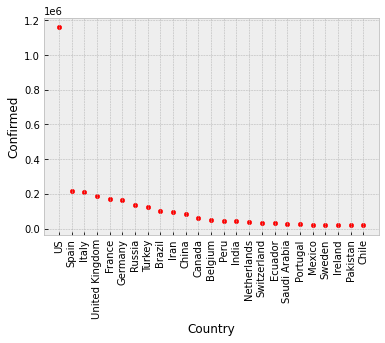

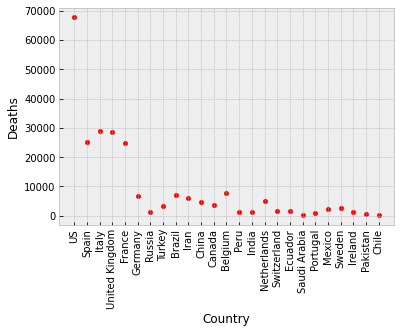

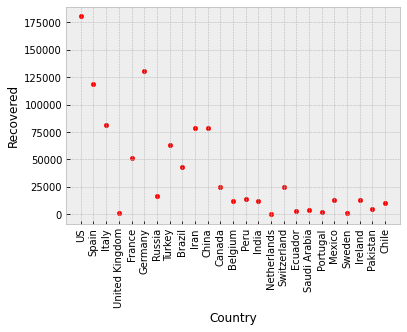

In [0]:

covid_top25_countries.plot(kind='scatter',x='Country',y='Confirmed',color='red')
plt.xticks(rotation=90)
plt.show()

covid_top25_countries.plot(kind='scatter',x='Country',y='Deaths',color='red')
plt.xticks(rotation=90)
plt.show()

covid_top25_countries.plot(kind='scatter',x='Country',y='Recovered',color='red')
plt.xticks(rotation=90)
plt.show()

In [0]:
covid_data_country_sub = (covid_data_today
 .filter(['Country','Date','Confirmed'])
 .query("Country in @covid_top25_countries.Country")
 .groupby(['Country','Date'])
 .agg('sum')
 .reset_index()
 .sort_values('Confirmed', ascending = False)
)
covid_data_country_sub

,Country,Date,Confirmed
23,US,2020-05-03,1158040
19,Spain,2020-05-03,217466
11,Italy,2020-05-03,210717
24,United Kingdom,2020-05-03,187842
6,France,2020-05-03,168925
7,Germany,2020-05-03,165664
17,Russia,2020-05-03,134687
22,Turkey,2020-05-03,126045
1,Brazil,2020-05-03,101826
9,Iran,2020-05-03,97424


In [0]:
covid_data_country_sub = (covid_data_today
 .filter(['Country','Date','Confirmed'])
 .query("Country in @covid_top9_countries.values")
 .groupby(['Country','Date'])
 .agg('sum')
 .reset_index()
)
covid_data_country_sub

,Country,Date,Confirmed
0,Brazil,2020-05-03,101826
1,France,2020-05-03,168925
2,Germany,2020-05-03,165664
3,Italy,2020-05-03,210717
4,Russia,2020-05-03,134687
5,Spain,2020-05-03,217466
6,Turkey,2020-05-03,126045
7,US,2020-05-03,1158040
8,United Kingdom,2020-05-03,187842


Text(0.5, 1.12, 'Growth of Daily Confirmed cases for COVID-19\nas of May 5, 2020')

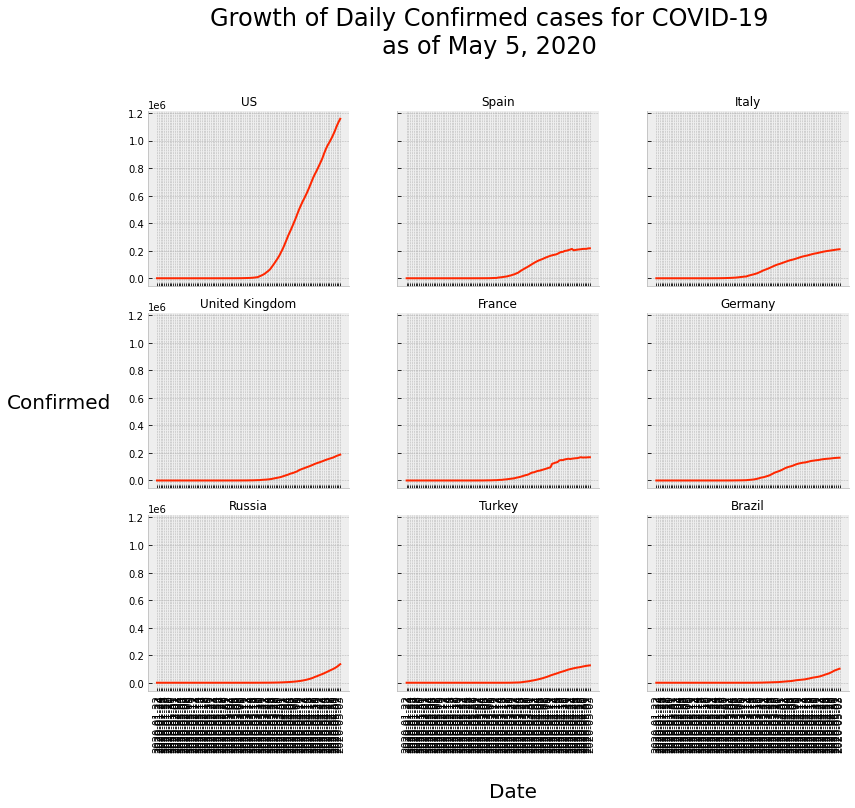

In [0]:
grid_layout = sns.FacetGrid(covid_data
                            ,col = 'Country'
                            ,col_wrap = 3
                            ,col_order= covid_top9_countries.values
                            ,aspect = 1.2
                            )
grid_layout.map(sns.lineplot, 'Date', 'Confirmed',color ='#FF2700')
grid_layout.set_titles('{col_name}')
for ax in grid_layout.axes:
    ax.set_xlabel("")
    ax.set_ylabel("")
for ax in grid_layout.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
grid_layout.fig.text(0.5, -.1,'Date', fontsize=20) #add text
grid_layout.fig.text(-0.12, .5,'Confirmed', fontsize=20) #add text
grid_layout.fig.suptitle('Growth of Daily Confirmed cases for COVID-19\nas of May 5, 2020'
                         ,y = 1.12
                         ,fontsize = 24
                         )

Text(0.5, 1.12, 'Growth of Daily Confirmed cases for COVID-19\nas of May 5, 2020')

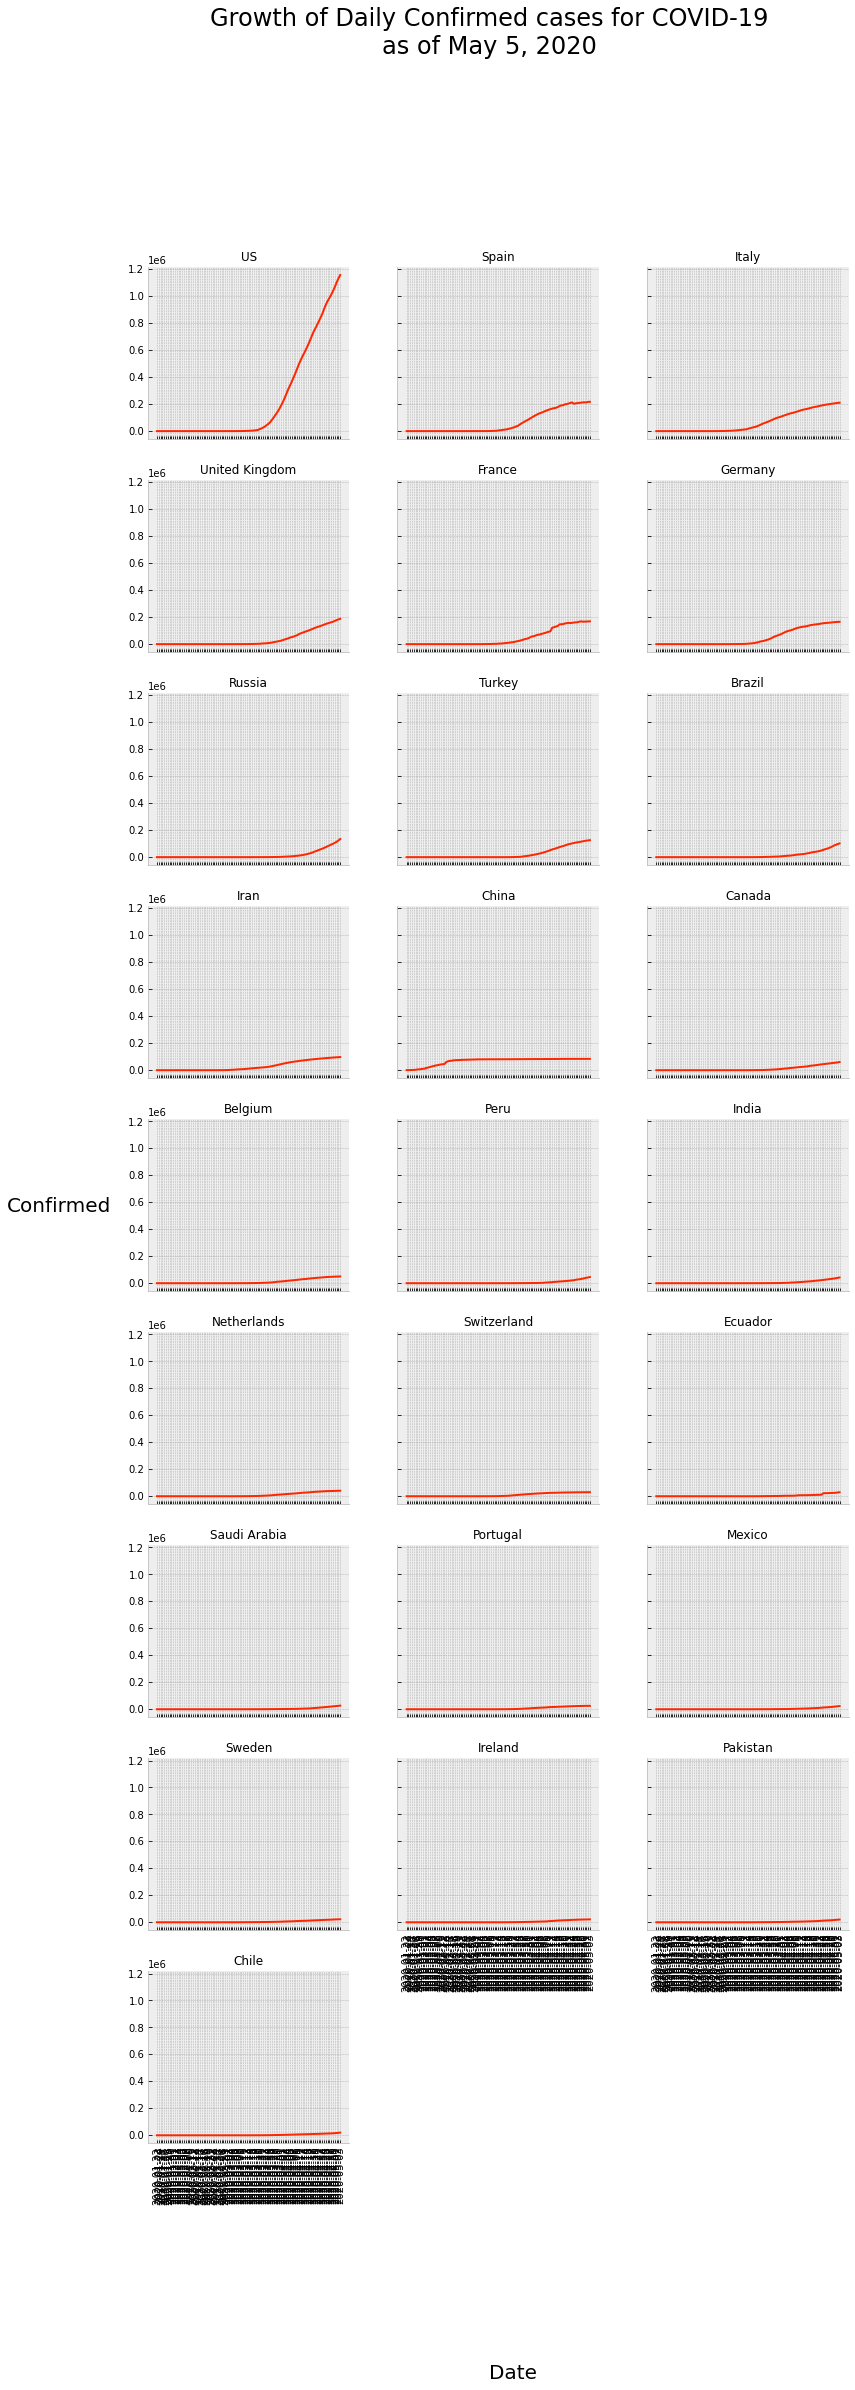

In [0]:
grid_layout = sns.FacetGrid(covid_data
                            ,col = 'Country'
                            ,col_wrap = 3
                            ,col_order= covid_top25_countries['Country']
                            ,aspect = 1.2
                            )
grid_layout.map(sns.lineplot, 'Date', 'Confirmed',color ='#FF2700')
grid_layout.set_titles('{col_name}')
for ax in grid_layout.axes:
    ax.set_xlabel("")
    ax.set_ylabel("")
for ax in grid_layout.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
grid_layout.fig.text(0.5, -.1,'Date', fontsize=20) #add text
grid_layout.fig.text(-0.12, .5,'Confirmed', fontsize=20) #add text
grid_layout.fig.suptitle('Growth of Daily Confirmed cases for COVID-19\nas of May 5, 2020'
                         ,y = 1.12
                         ,fontsize = 24
                         )

# **Deaths in Pakistan Reasons**

In [0]:
# Dengue
# Months From 8 July to 12 November 2019,
# a total of 47,120 confirmed cases of dengue fever, including 75 deaths
#KPK
#  a total of 7,641 confirmed cases of dengue fever were reported from KP and KP Tribal Districts
#PUNJAB
#  a total of 9,676 confirmed dengue fever cases, including 16 deaths, have been reported
# AJK
# a total of 1,689 confirmed cases of dengue fever, with one death, were reported.
# ISLAMABAD
#  12,986 confirmed cases of dengue fever, including 22 deaths, have been reported from eight major hospitals in Islamabad.
# SINDH
#  a total of 12,053 confirmed cases of dengue fever, including 33 deaths, have been reported.
# BALOCHISTAN
# a total of 3,075 confirmed cases of dengue fever were reported with three deaths.


In [0]:
# CANCER

# Population in 2012:	179.9m
# People newly diagnosed with cancer (excluding NMSC) / yr:	148,000
# Age-standardised rate, incidence per 100,000 people/yr: 	111.8
# Risk of getting cancer before age 75:	11.8%
# People dying from cancer /yr:	101,000

